<a href="https://colab.research.google.com/github/sielefaith/Neural-Nets/blob/feature/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term
(70000, 784)
Counter({'1': 7877, '7': 7293, '3': 7141, '2': 6990, '9': 6958, '0': 6903, '6': 6876, '8': 6825, '4': 6824, '5': 6313})


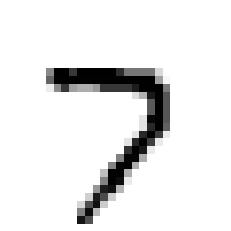

digit 0 appears 6903 times
digit 1 appears 7877 times
digit 2 appears 6990 times
digit 3 appears 7141 times
digit 4 appears 6824 times
digit 5 appears 6313 times
digit 6 appears 6876 times
digit 7 appears 7293 times
digit 8 appears 6825 times
digit 9 appears 6958 times
Reached epoch 0 cost J = 0.678540
Reached epoch 500 cost J = 0.108484
Reached epoch 1000 cost J = 0.078730
Reached epoch 1500 cost J = 0.066561
Reached epoch 2000 cost J = 0.059643
Reached epoch 2500 cost J = nan
Reached epoch 3000 cost J = nan
Reached epoch 3500 cost J = nan
Reached epoch 4000 cost J = nan
Reached epoch 4500 cost J = nan
Reached epoch 5000 cost J = nan


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
mnist = fetch_openml('mnist_784')
X,y = mnist["data"],mnist["target"]
print(X.shape)
#count elements in an array
print(Counter(y))
 
#visualize the digits
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
plot_digit(X[36003])
 
#convert the y string to float
Y = y.astype(np.float)
#check  no. of digits
for i in range(10):
    print("digit",i,"appears",np.count_nonzero(Y == i),"times")
#Reduce dataset to two classes
X_train = X[np.any([Y == 1, Y == 2], axis = 0)]
y_train = Y[np.any([Y == 1, Y == 2], axis = 0)]
 
#Normalize input observations
X_train_normalized = X_train / 255.0
 
X_train_tr = X_train_normalized.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
 
#Contain number of features
n_dim = X_train_tr.shape[0]
 
#Rescale our y_train_tr array(from 1 or 2, to 0 and 1)
y_train_shifted = y_train_tr - 1
 
#Use proper variable names
Xtrain = X_train_tr
ytrain = y_train_shifted
 
#print(Xtrain,ytrain)
 
#Tensorflow
#Define placeholders and Variables
tf.reset_default_graph()
 
X = tf.placeholder(tf.float32,[n_dim,None])
y = tf.placeholder(tf.float32,[1,None])
learning_rate = tf.placeholder(tf.float32,shape=())
 
w = tf.Variable(tf.zeros([1,n_dim]))
b = tf.Variable(tf.zeros(1))
 
init = tf.global_variables_initializer()
 
y_ = tf.sigmoid(tf.matmul(w,X)+b)
cost = -tf.reduce_mean(y*tf.log(y_) + (1 - y)*tf.log(1 - y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
def run_logistic_model(learning_r,training_epochs,train_obs,train_labels,debug=False):
    sess = tf.Session()
    sess.run(init)
    cost_history = np.empty(shape=[0],dtype=float)
    for epoch in range(training_epochs + 1):
        sess.run(training_step,feed_dict={X:train_obs,y:train_labels,learning_rate:learning_r})
        cost_ = sess.run(cost,feed_dict = {X:train_obs,y:train_labels,learning_rate:learning_r})
        cost_history = np.append(cost_history,cost_)
        if (epoch % 500 == 0) & debug:
            print("Reached epoch",epoch,"cost J =",str.format('{0:.6f}',cost_))
    return sess,cost_history
 
sess,cost_history = run_logistic_model(learning_r=0.01,training_epochs=5000,train_obs=Xtrain,train_labels=ytrain,debug=True)